In [4]:
# Gabriel Chang

# funcion para descargar paquetes al ejecutar el scrip, sin necesidad de hacerlo por la terminal
# igualmente hice esto en la última tarea, solo por cuestión de mejorar el ejecución
# en diferentes máquinas

import os
import subprocess
import sys

# en ese arreglo incluyo los paquetes que debo instalar, para facilitar el mantenimiento
# (las necesarias para la asignacion de EDA U3T2)
required_packages = ['pandas', 'matplotlib', 'numpy', 'seaborn']

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

In [5]:
# hago un for each iterando en el arreglo de paquetes requeridos, y los instalo
# si es que no lo están

for package in required_packages:
    try:
        __import__(package)
        print(f"'{package}' ya está instalado.")
    except ImportError:
        print(f"'{package}' no está instalado. Instalando...")
        install(package)

'pandas' ya está instalado.
'matplotlib' ya está instalado.
'numpy' ya está instalado.
'seaborn' ya está instalado.


In [6]:
# Import de librerias e inicialización del data frame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

In [10]:
# data set --> CO2 emission by countries
url = 'https://raw.githubusercontent.com/spamella04/InteligenciadeNegocios2024/refs/heads/Gabriel/GCHANG%20-%20U3T2/CO2%20emission%20by%20countries.csv'

try:
    data_frame = pd.read_csv(url, encoding='unicode_escape')

    # Crear una copia del dataset original para modificar
    data_frame_modificado = data_frame.copy()

    print('Archivo CSV cargado al Data Frame exitosamente')

    print('\nIMPRIMIENDO HEAD DEL DATA SET\n :', data_frame_modificado.head())

except Exception as ex:
    print('ERROR AL CARGAR EL DF --> ', ex)

Archivo CSV cargado al Data Frame exitosamente

IMPRIMIENDO HEAD DEL DATA SET
 :        Country Code Calling Code  Year  CO2 emission (Tons)  Population(2022)  \
0  Afghanistan   AF           93  1750                  0.0        41128771.0   
1  Afghanistan   AF           93  1751                  0.0        41128771.0   
2  Afghanistan   AF           93  1752                  0.0        41128771.0   
3  Afghanistan   AF           93  1753                  0.0        41128771.0   
4  Afghanistan   AF           93  1754                  0.0        41128771.0   

       Area % of World Density(km2)  
0  652230.0      0.40%       63/km²  
1  652230.0      0.40%       63/km²  
2  652230.0      0.40%       63/km²  
3  652230.0      0.40%       63/km²  
4  652230.0      0.40%       63/km²  


In [14]:
# Cantidad de registros:
print('CANTIDAD DE REGISTROS (FILAS) EN EL DATA SET --> ', data_frame_modificado.shape[0])

# Cantidad de columnas:
print('\nCANTIDAD DE COLUMNAS (VARIABLES) EN EL DATA SET --> ', data_frame_modificado.shape[1])

# Descripcion de los datos
print(f'\nIMPRIMIENDO TIPOS DE DATOS POR COLUMNA:\n')
print(data_frame_modificado.info())

# Estadísticas básicas
print(f'\nIMPRMIENDO ESTADÍSTICAS BÁSICAS DEL DATA FRAME:')
print(data_frame_modificado.describe().T)

CANTIDAD DE REGISTROS (FILAS) EN EL DATA SET -->  59620

CANTIDAD DE COLUMNAS (VARIABLES) EN EL DATA SET -->  9

IMPRIMIENDO TIPOS DE DATOS POR COLUMNA:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB
None

IMPRMIENDO ESTADÍSTICAS BÁSICAS DEL DATA FRAME:
                       count          mean           std      min       

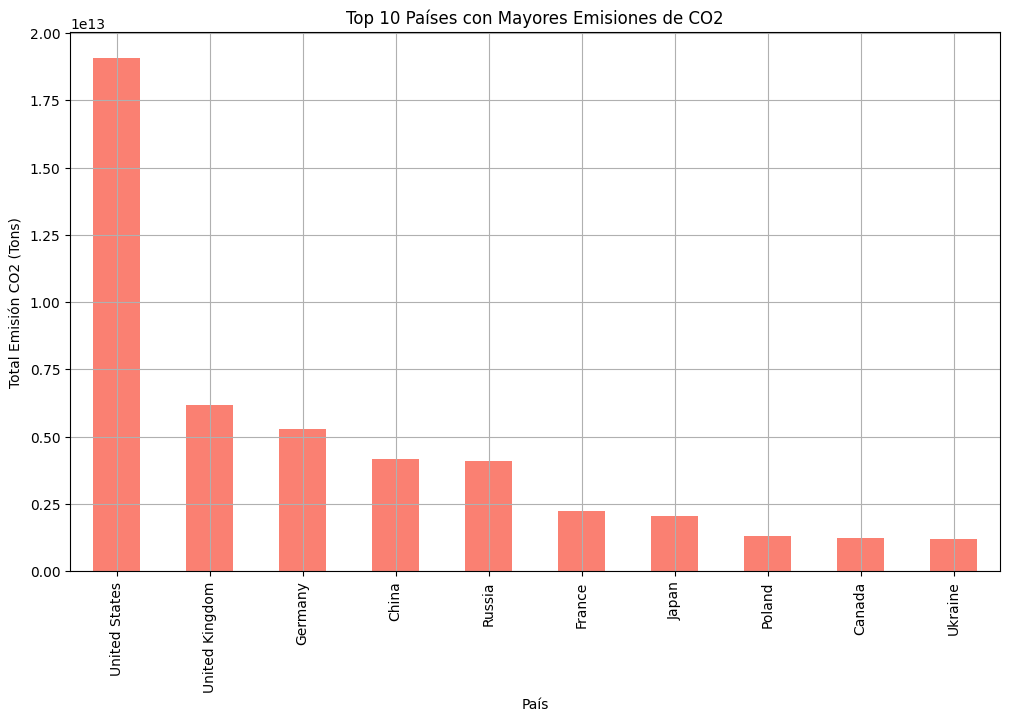

In [22]:
# (sección de visualización de datos) agrupamos los top 10 paises que más CO2 emiten
# para crear un gráfico de barras para comprarar y ver el ranking
top_paises = data_frame_modificado.groupby('Country')['CO2 emission (Tons)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
top_paises.plot(kind='bar', color='salmon')
plt.title('Top 10 Países con Mayores Emisiones de CO2')
plt.xlabel('País')
plt.ylabel('Total Emisión CO2 (Tons)')
plt.grid(True)
plt.show()

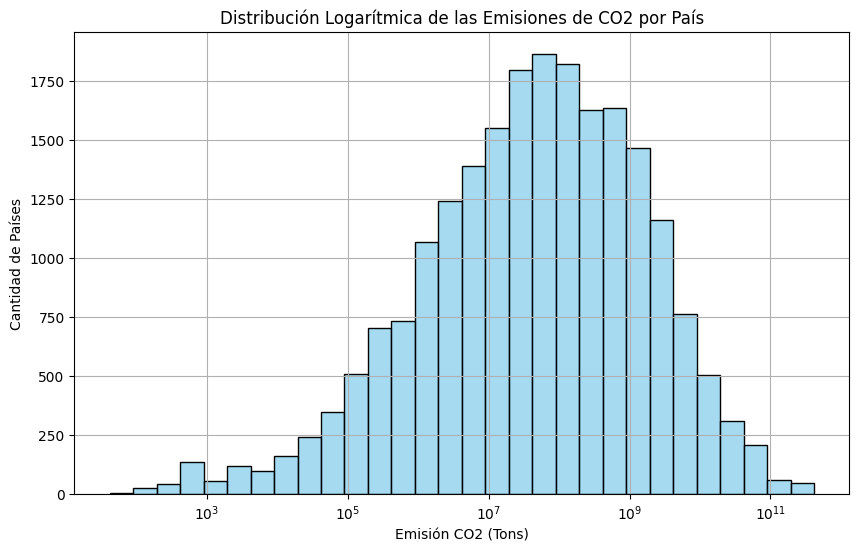

In [28]:
# Histograma con escala logarítmica de la cantidad de paises que emiten cada cantidad de 
# toneladas de emisión. creé un gráfico con escala logarítmica para mejorar 
# la visibilidad del gráfico
plt.figure(figsize=(10, 6))
sea.histplot(data_frame_modificado['CO2 emission (Tons)'], kde=False, bins=30, color='skyblue', log_scale=True)
plt.title('Distribución Logarítmica de las Emisiones de CO2 por País')
plt.xlabel('Emisión CO2 (Tons)')
plt.ylabel('Cantidad de Países')
plt.grid(True)
plt.show()

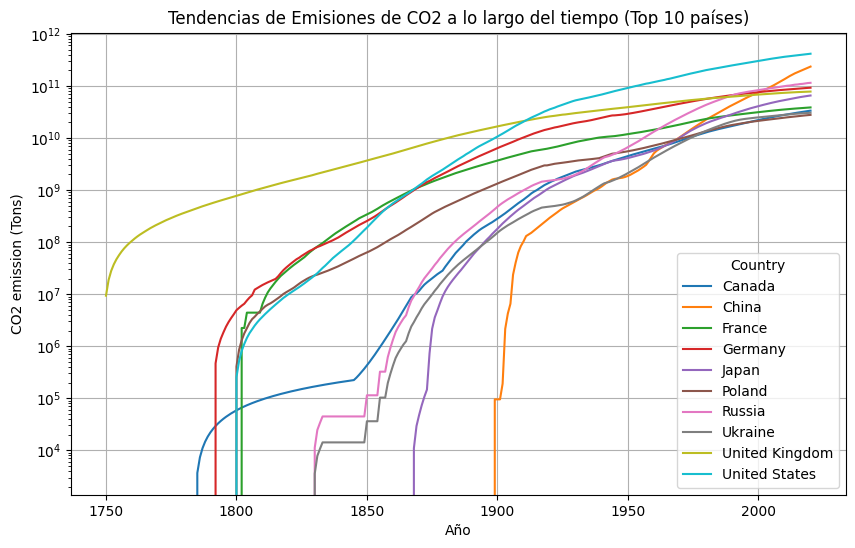

In [37]:
plt.figure(figsize=(10, 6))

top_paises = data_frame_modificado.groupby('Country')['CO2 emission (Tons)'].sum().sort_values(ascending=False).head(10).index
sea.lineplot(data=data_frame_modificado[data_frame_modificado['Country'].isin(top_paises)], x='Year', y='CO2 emission (Tons)', hue='Country')

plt.title('Tendencias de Emisiones de CO2 a lo largo del tiempo (Top 10 países)')
plt.xlabel('Año')
plt.ylabel('CO2 emission (Tons)')
plt.yscale('log')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

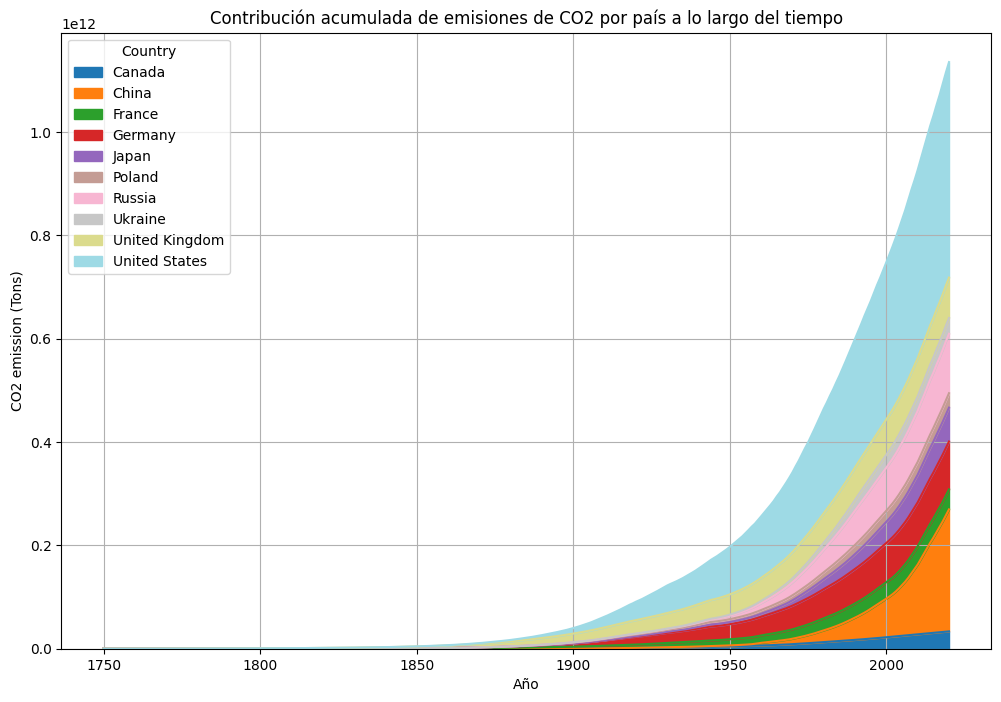

In [38]:
# Gráfico de áreas apiladas para mostrar la contribución acumulada de emisiones por país
plt.figure(figsize=(10, 6))

# Filtramos los países con mayores emisiones
top_countries = data_frame_modificado.groupby('Country')['CO2 emission (Tons)'].sum().sort_values(ascending=False).head(10).index

# Pivotamos el DataFrame para tener los años como filas y los países como columnas
df_pivot = data_frame_modificado[data_frame_modificado['Country'].isin(top_countries)].pivot_table(index='Year', columns='Country', values='CO2 emission (Tons)', aggfunc='sum')

# Gráfico de áreas apiladas
df_pivot.plot(kind='area', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Contribución acumulada de emisiones de CO2 por país a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('CO2 emission (Tons)')
plt.grid(True)
plt.show()